# About this note
- pytorch
- VGG16
- Image classification

## Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
from PIL import Image

import torch
from torchvision import models,transforms
import torchvision
print('Pytorch ver:',torch.__version__)
print('torchvison ver:',torchvision.__version__)

Pytorch ver: 1.7.1
torchvison ver: 0.8.2


In [2]:
class CFG():
    size = 224
    


In [3]:
# config
pretrained = True
# vgg16
model = models.vgg16(pretrained=pretrained)

# 推論モード
model.eval()
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [4]:
class BaseTransform():
    # preprocess

    def __init__(self):
        self.base_transform = transforms.Compose([
            transforms.Resize(CFG.size),
            transforms.CenterCrop(CFG.size),
            transforms.ToTensor(),
            transforms.Normalize(
                mean=(0.485,0.456,0.406),
                std=(0.229,0.224,0.225)
            )
        ])

    def __call__(self,img):
        return self.base_transform(img)

In [5]:
image_path = './goldenretriever-3724972_640.jpg'
img = Image.open(image_path)

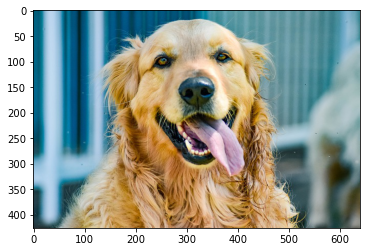

In [6]:
# 画像表示
plt.imshow(img);

In [10]:
transform = BaseTransform()
img_transformed = transform(img)
print(img_transformed.shape)
print(img_transformed.max())
print(img_transformed.min())

torch.Size([3, 224, 224])
tensor(2.4657)
tensor(-2.1179)


In [11]:
img_transformed = img_transformed.numpy().transpose((1,2,0))
img_transformed = np.clip(img_transformed, 0, 1)
print(img_transformed.shape)
print(img_transformed.max())
print(img_transformed.min())

(224, 224, 3)
1.0
0.0


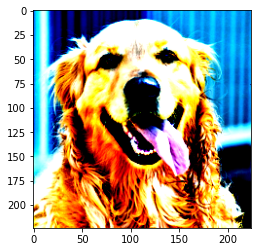

In [12]:
plt.imshow(img_transformed);

In [17]:
class_index = json.load(open('./imagenet_class_index.json','r'))
class_index['111']

['n01930112', 'nematode']

In [23]:
class Predictor():

    def __init__(self, class_index):
        self.class_index = class_index

    def predict(self, out):
        id = np.argmax(out.detach().numpy())

        return self.class_index[str(id)][1]

In [25]:
pred = Predictor(class_index)

img_transformed = transform(img)

inp = img_transformed.unsqueeze_(0)
out = model(inp)

print('pred_label:',pred.predict(out))

pred_label: golden_retriever
